In [1]:
import pandas as pd

In [2]:
startup = pd.read_csv('D:\ExcelR_Classes_Data\Assignments\Data_Science\Assignment - 05 (Multiple Linear Regession)\/50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup1 = startup.rename({'R&D Spend':'RnD', 'Marketing Spend':'Marketing'}, axis = 1)

In [6]:
startup1.describe()

,RnD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startup1.corr()

,RnD,Administration,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
## there is a colinearity problem with Marketing and RnD variable

In [9]:
startup[startup.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


## Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
var = startup1.iloc[:, :3]

In [12]:
var.head()

,RnD,Administration,Marketing
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


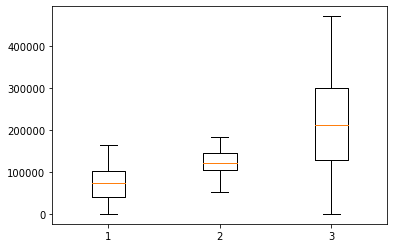

In [13]:
plt.boxplot(var)

plt.show()

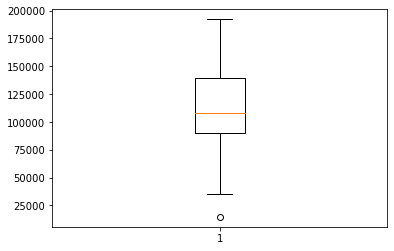

In [14]:
plt.boxplot(startup['Profit'])
plt.show()

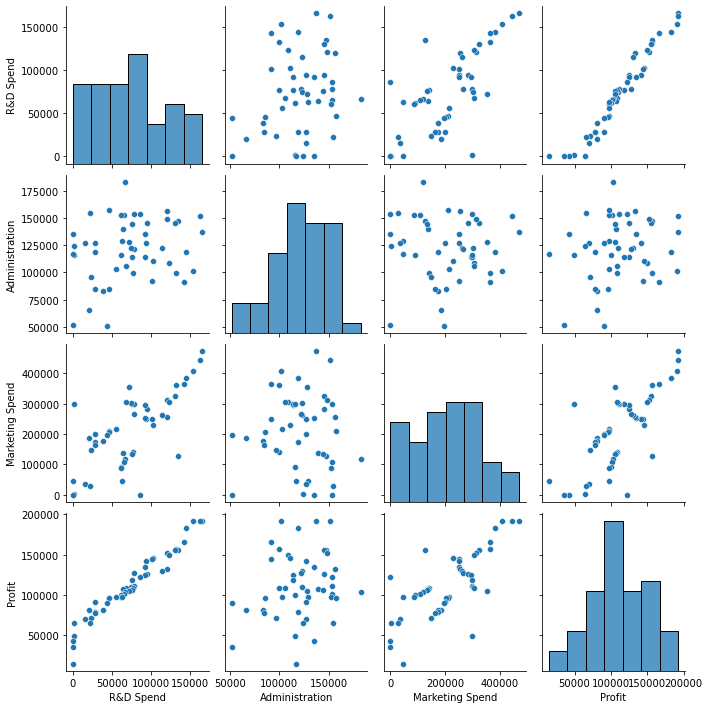

In [15]:
sns.pairplot(startup)

## Model Building

In [16]:
import statsmodels.formula.api as smf

In [17]:
model1 = smf.ols("Profit ~ RnD + Administration + Marketing ", data = startup1).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.53e-30
Time:                        14:51:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Administration and Marketing are having p value > than alpha(0.05)

In [20]:
model1_admin = smf.ols("Profit ~ Administration", data = startup1).fit()

In [21]:
model1_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.162
Time:                        14:51:19   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model1_marketing = smf.ols("Profit ~ Marketing", data = startup1).fit() 

In [23]:
model1_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           4.38e-10
Time:                        14:51:19   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model1_combo = smf.ols("Profit ~ Marketing + Administration", data = startup1).fit()

In [25]:
model1_combo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.50e-10
Time:                        14:51:19   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
startup1.corr()

,RnD,Administration,Marketing,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [27]:
## from models result we can say there is problem of co-linearity

In [28]:
## Model Validation Techniques
## VIF Method

In [29]:
rsq_rnd = smf.ols("RnD ~ Administration + Marketing", data = startup1).fit().rsquared
vif_rnd = 1/(1-rsq_rnd)

rsq_admin = smf.ols("Administration ~ RnD + Marketing", data = startup1).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_marketing = smf.ols("Marketing ~ Administration + RnD", data = startup1).fit().rsquared
vif_marketing = 1/(1-rsq_marketing)

In [30]:
data_dict = {"Variables":['RnD', 'Administration', 'Marketing'], 
            "VIF_Values":[vif_rnd, vif_admin, vif_marketing]}

In [31]:
data = pd.DataFrame(data_dict)

In [32]:
data

,Variables,VIF_Values
0,RnD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


In [33]:
# no problem with vif values, we are cheking for Residuals 

In [34]:
error = model1.resid

In [35]:
error

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [36]:
error.mean()

7.625203579664231e-11

In [37]:
## plotting error on QQ plot

import statsmodels.api as statapi

Text(0.5, 1.0, 'QQ-Plot')

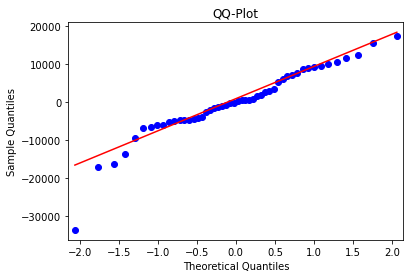

In [38]:
qq_plot = statapi.qqplot(error, line = "q")
plt.title("QQ-Plot")

In [39]:
import numpy as np

In [40]:
list(np.where(model1.resid < -30000))

[array([49], dtype=int64)]

In [41]:
a = startup1.drop(49).reset_index(drop = True)

In [42]:
b = pd.DataFrame(a)

In [43]:
b.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Model Detection Diagnostics (checking Outliers)

### using cooks Distance

In [44]:
#from statsmodels.graphics.regressionplots import influence_plot
influence = model1.get_influence()

In [45]:
(c, extra) = influence.cooks_distance

In [46]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [47]:
extra

array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
       0.99971836, 0.99998231, 0.99997361, 1.        , 0.9999509 ,
       0.99953404, 0.99945472, 0.99972613, 0.99996657, 0.99282118,
       0.99770282, 0.99985673, 0.99997731, 0.99999022, 0.99673318,
       0.99999962, 0.99975216, 0.99998231, 0.99999984, 0.99994724,
       0.99998129, 0.99997572, 0.99822013, 0.99999639, 0.99999997,
       1.        , 1.        , 0.99999895, 0.99999997, 0.99910872,
       0.99990736, 0.99405874, 0.99999999, 0.99393004, 0.99999504,
       0.99999289, 0.99999188, 0.99999996, 0.99914403, 0.99999997,
       0.98504126, 0.99426283, 0.99994097, 0.94214883, 0.88422352])

### Plotting cooks distance

Text(0, 0.5, 'cooks distance')

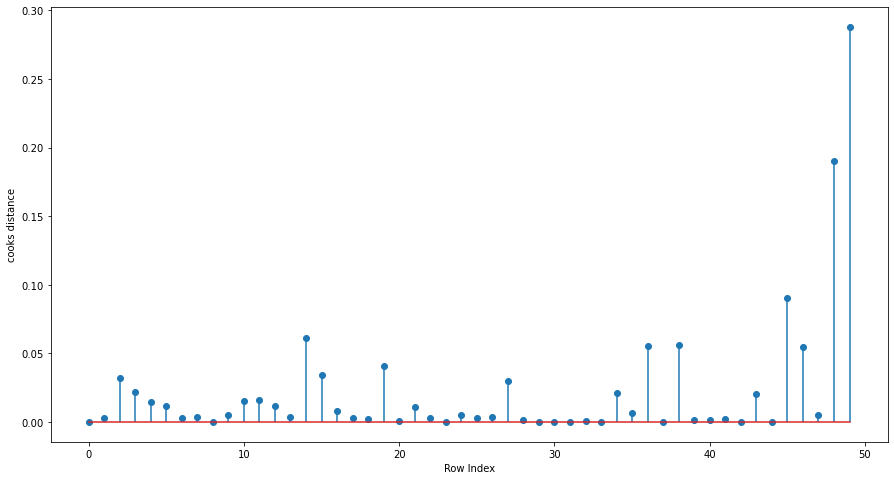

In [48]:
fig = plt.subplots(figsize = (15, 8))
plt.stem(np.arange(len(startup1)), np.round(c, 4))
plt.xlabel("Row Index")
plt.ylabel("cooks distance")

In [49]:
np.argmax(c)

49

In [50]:
np.max(c)

0.28808229275432634

In [51]:
startup1[startup1.index.isin([49, 48])]

,RnD,Administration,Marketing,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [52]:
start2 = startup1.drop(49).reset_index(drop = True)

In [53]:
start3 = startup1.drop(48).reset_index(drop = True)

In [54]:
start3.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
startup1.duplicated().sum()

0

In [56]:
startup1.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [57]:
final_model = smf.ols("Profit ~ RnD + Administration + Marketing ", data = start3).fit()

In [58]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     284.6
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.92e-29
Time:                        14:51:21   Log-Likelihood:                -513.87
No. Observations:                  49   AIC:                             1036.
Df Residuals:                      45   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.568e+04   7237.676      7.693      0.000    4.11e+04    7.03e+04
RnD                0.8120      0.044     18.278      0.000       0.722       0.901
Administration    -0.0615      0.054     -1.137      0.262      -0.170       0.047
Marketing          0.0203      0.017      1.220      0.229      -0.013       0.054
==============================================================================
Omnibus:                       19.614   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.399
Skew:                          -1.137   Prob(JB):                     1.25e-08
Kurtosis:                       6.558   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
influence2 = final_model.get_influence()

In [60]:
c, extra = influence2.cooks_distance

In [61]:
c

array([7.40712956e-04, 1.07826988e-02, 3.23819813e-02, 2.43104575e-02,
       1.95299757e-02, 1.38687479e-02, 4.42362765e-03, 2.43938535e-03,
       4.52640035e-04, 6.07833581e-03, 1.44112192e-02, 1.39328947e-02,
       1.20241002e-02, 4.65212842e-03, 6.07238096e-02, 3.64322277e-02,
       8.67989340e-03, 2.51854345e-03, 2.38145348e-03, 3.44139425e-02,
       4.35713740e-04, 7.58475377e-03, 2.60645871e-03, 3.85645993e-04,
       1.12687295e-02, 2.93713955e-03, 3.70475462e-03, 2.66053893e-02,
       4.35147740e-03, 1.04407833e-04, 1.41334314e-04, 1.26305002e-05,
       2.38984392e-03, 4.44723421e-04, 3.02177924e-02, 4.69187053e-03,
       5.82692551e-02, 4.53364005e-03, 4.75947836e-02, 5.23180958e-03,
       1.49997307e-03, 5.00160088e-04, 4.57510247e-05, 1.84534143e-02,
       7.86284020e-05, 8.84132984e-02, 4.87228558e-02, 8.56951396e-03,
       3.51578937e-01])

In [62]:
extra

array([0.99999886, 0.9997609 , 0.99790981, 0.99880816, 0.99922548,
       0.99960621, 0.99995939, 0.99998761, 0.99999957, 0.9999235 ,
       0.99957514, 0.9996026 , 0.99970321, 0.9999551 , 0.99294279,
       0.99736962, 0.99984459, 0.9999868 , 0.99998819, 0.99764616,
       0.9999996 , 0.99988114, 0.99998586, 0.99999969, 0.99973904,
       0.99998206, 0.99997148, 0.99857723, 0.9999607 , 0.99999998,
       0.99999996, 1.        , 0.99998811, 0.99999959, 0.99817418,
       0.99995433, 0.99347893, 0.99995735, 0.99558225, 0.99994326,
       0.99999531, 0.99999948, 1.        , 0.99930744, 0.99999999,
       0.98561819, 0.99537784, 0.99984849, 0.84155799])

Text(0, 0.5, 'coocks Distance')

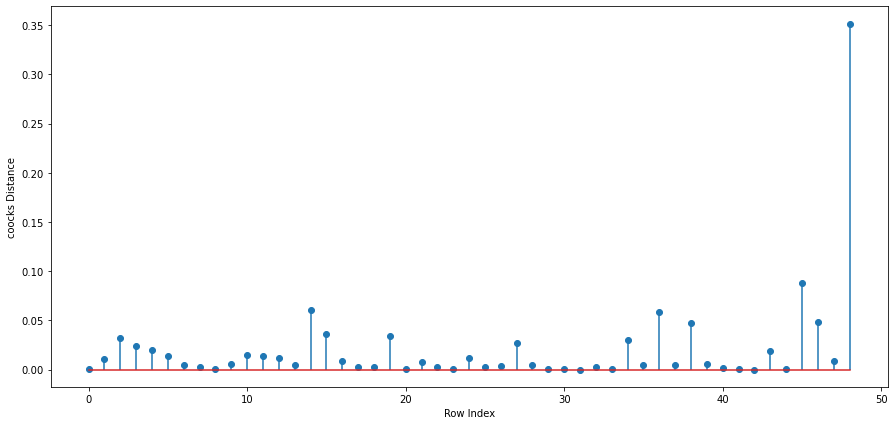

In [63]:
fig = plt.subplots(figsize = (15, 7))
plt.stem(np.arange(len(start3)), np.round(c, 4))
plt.xlabel("Row Index")
plt.ylabel("coocks Distance")

In [64]:
np.argmax(c)

48

In [65]:
np.max(c)

0.35157893745942254

In [66]:
start3[start3.index.isin([48])]

,RnD,Administration,Marketing,State,Profit
48,0.0,116983.8,45173.06,California,14681.4


In [67]:
start4 = start3.drop(48).reset_index(drop = True)

In [68]:
start4[start4.index.isin([48])]

,RnD,Administration,Marketing,State,Profit


In [69]:
model_final_2 = smf.ols("Profit ~ RnD + Administration + Marketing", data = start4).fit()

In [70]:
model_final_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 25 Nov 2021   Prob (F-statistic):           2.03e-31
Time:                        14:51:21   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RnD                0.7895      0.036     21.718      0.000       0.716       0.863
Administration    -0.0633      0.044     -1.442      0.156      -0.152       0.025
Marketing          0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
startup1.head()

,RnD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [73]:
## for RMSE we need to train model using train_test_split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = start4.iloc[:, :3]
y = start4['Profit']

In [76]:
X.head()

,RnD,Administration,Marketing
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [77]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 25)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression(fit_intercept = True)

In [81]:
lr.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = lr.predict(X_test)

In [83]:
mean_squared_error(y_test, y_pred)
#Mean sqr error

62101888.01900875

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))
#root mean sqr error

7880.475113786525